# Decision Tree classifier

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
df = pd.read_csv('D:\\datasets\\drug200.csv')

In [26]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [27]:
df.shape

(200, 6)

In [28]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [30]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

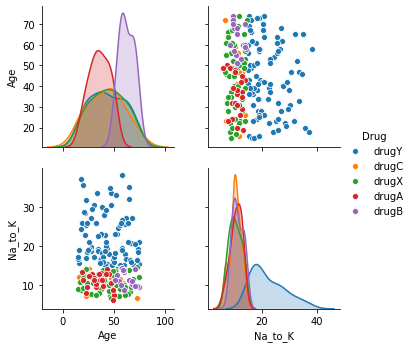

In [31]:
sns.pairplot(df,hue='Drug')

In [32]:
# ID3 USING ENTROPY

In [33]:
X =  df[['Age','Sex','BP','Cholesterol','Na_to_K']].values

In [34]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

In [35]:
le_bp = preprocessing.LabelEncoder()
le_bp.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_bp.transform(X[:,2])

In [36]:
le_chol = preprocessing.LabelEncoder()
le_chol.fit(['NORMAL','HIGH'])
X[:,3] = le_chol.transform(X[:,3])

In [37]:
le_drug = preprocessing.LabelEncoder()
y=le_drug.fit_transform(df['Drug'])
#y = le_drug.transform(y)
#y = df['Drug']
y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)
drugtree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
drugtree    # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
drugtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
predtree = drugtree.predict(X_test)

In [43]:
predtree[0:5]

array([4, 3, 3, 3, 3])

In [44]:
y_test[0:5]

array([4, 3, 3, 3, 3])

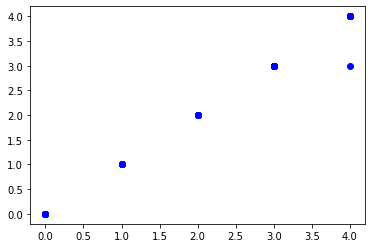

In [45]:
plt.plot(predtree,y_test,'bo')

In [46]:
drugtree.score(X_train,y_train)

1.0

In [47]:
from sklearn import metrics
print('Decisiontree accuracy : ', metrics.accuracy_score(y_test,predtree))

Decisiontree accuracy :  0.9833333333333333


In [48]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


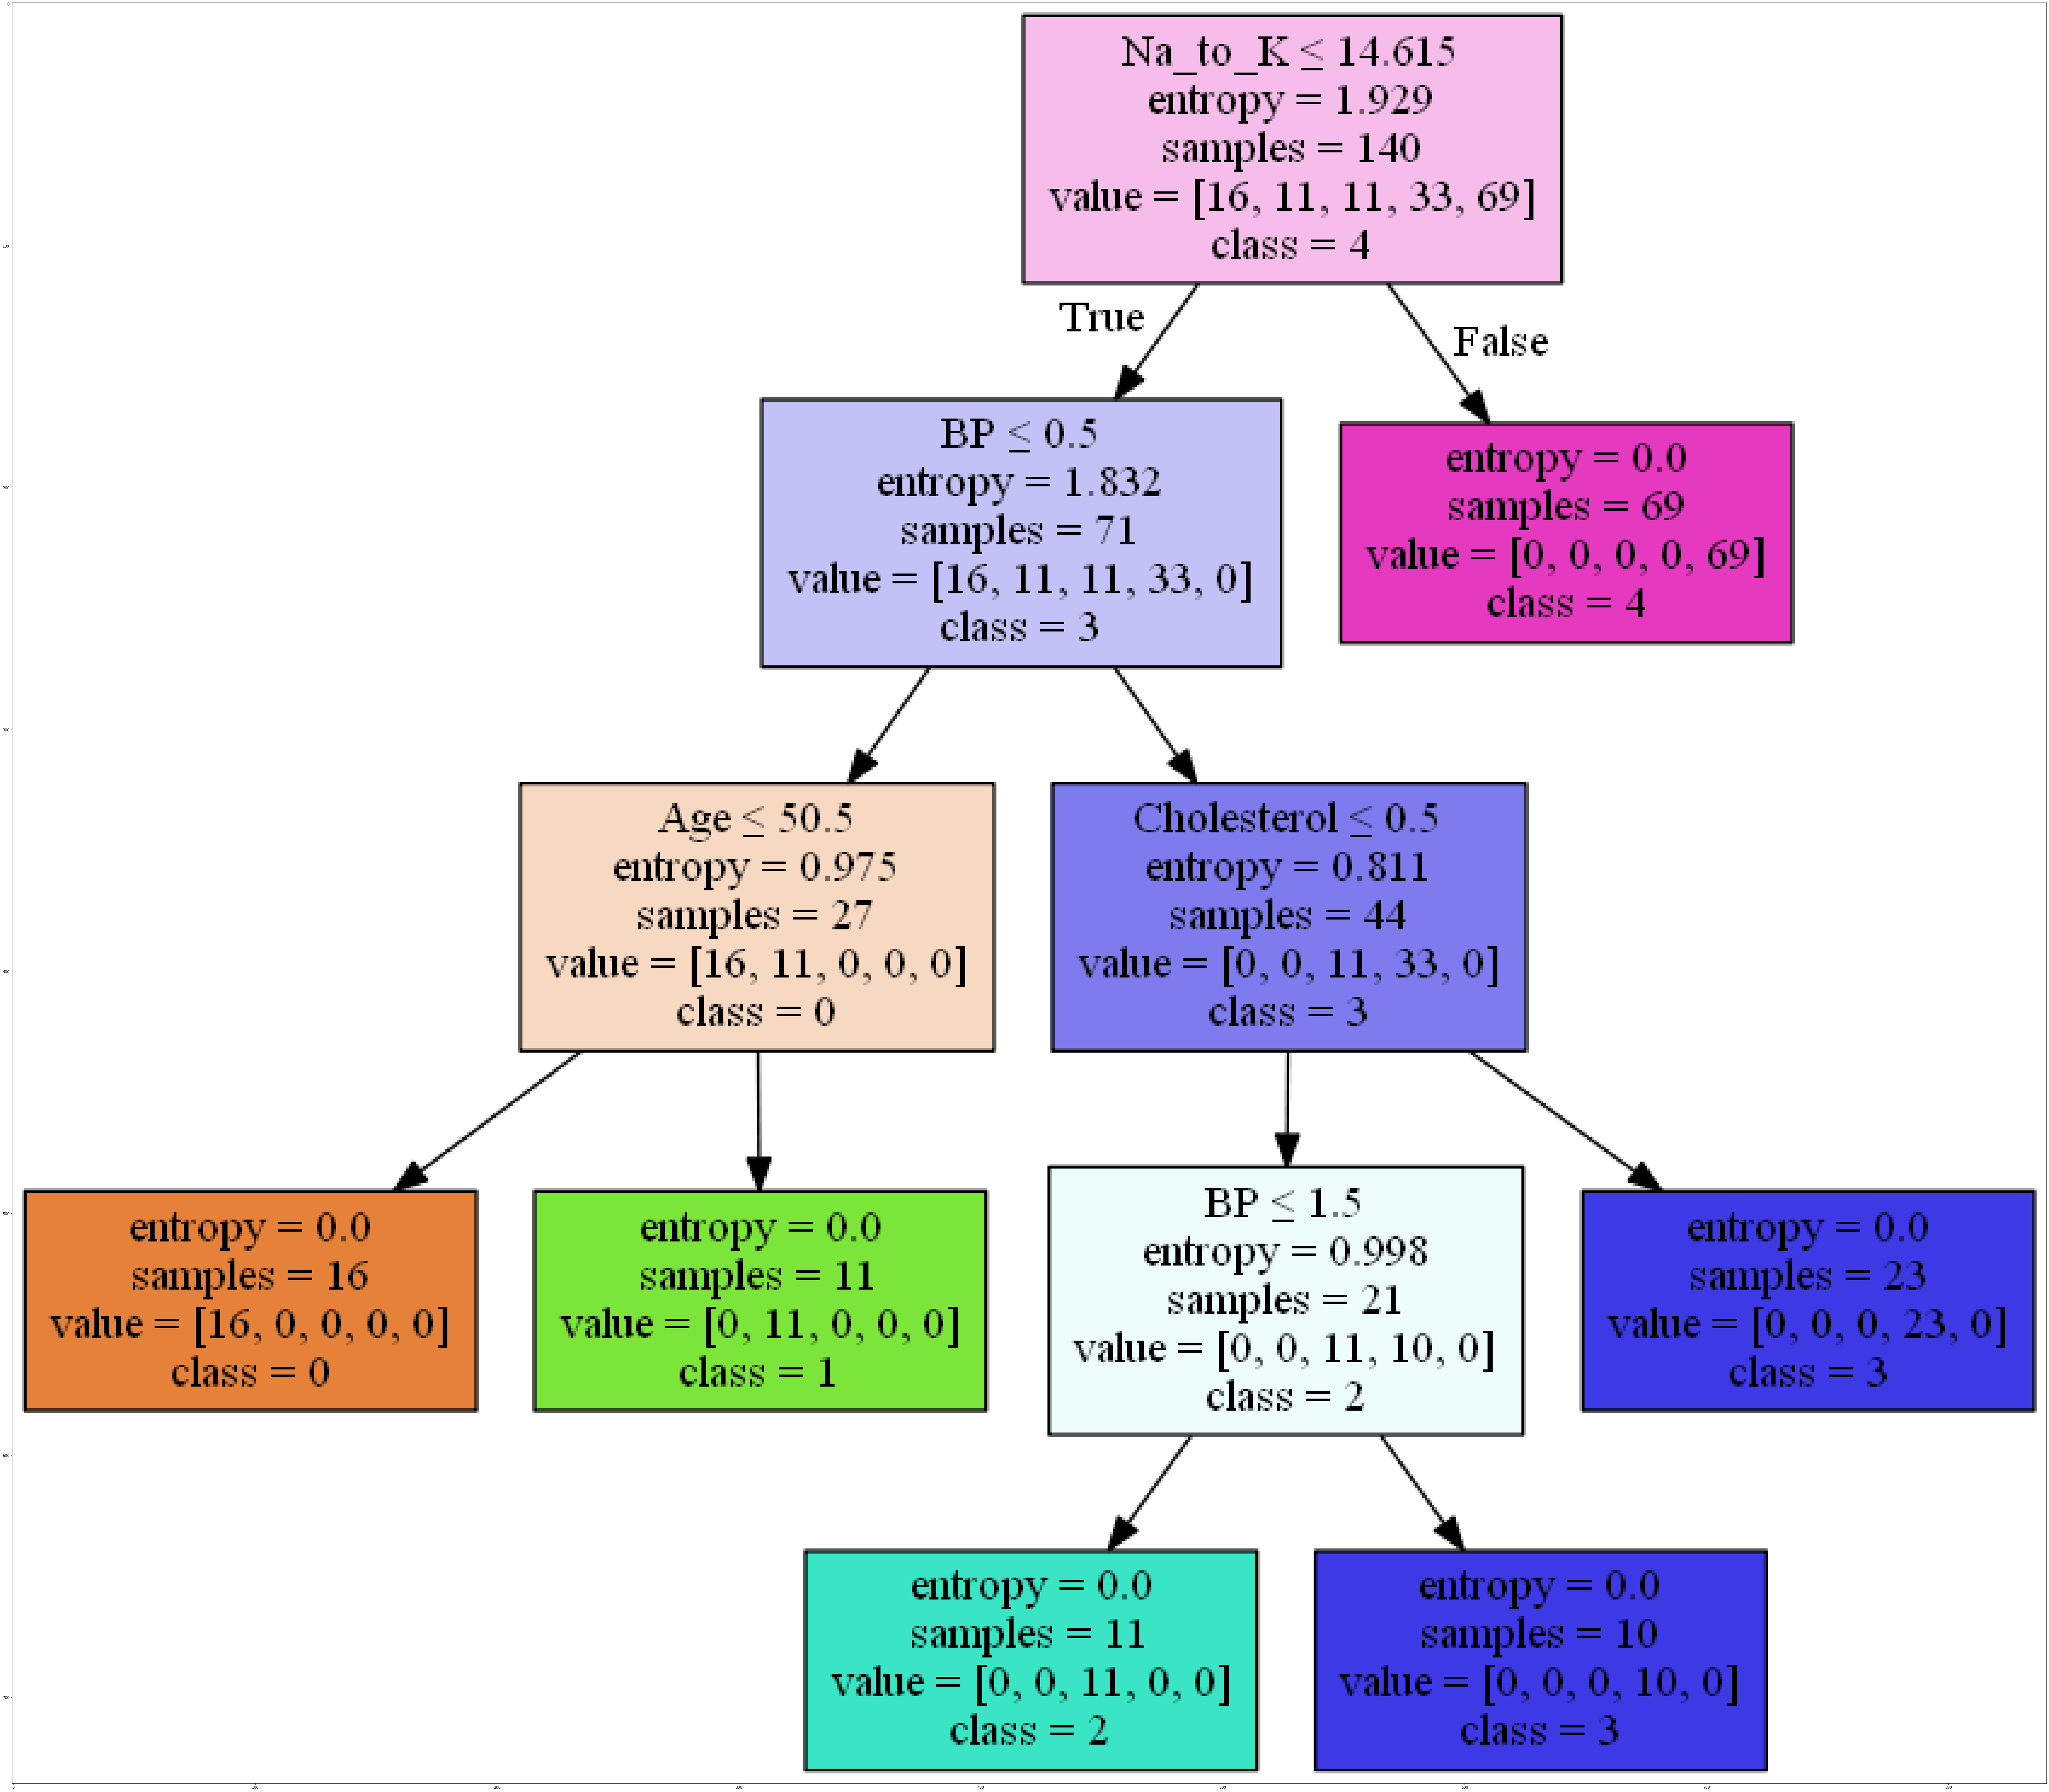

In [72]:
dot_data = StringIO()
filename = 'drugtr.png'
featureNames = df.columns[0:5]
targetNames = df['Drug'].unique().tolist()

out = tree.export_graphviz(drugtree, feature_names=featureNames, out_file=dot_data, class_names=
                            np.unique(y_train).astype('str'), filled=True,special_characters=True,rotate=False)



graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png(filename)


img = mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img)


In [74]:
out

In [75]:
# pip install decision-tree-id3

In [76]:
from id3 import Id3Estimator
estimator = Id3Estimator()
model = estimator.fit(X_train,y_train)

In [77]:
model_pred = estimator.predict(X_test) 

In [78]:
model_pred

array([4, 3, 2, 2, 3, 3, 4, 0, 1, 0, 4, 0, 4, 4, 3, 4, 3, 3, 1, 3, 2, 4,
       4, 4, 3, 1, 4, 4, 0, 2, 1, 2, 2, 2, 3, 3, 4, 3, 3, 2, 0, 4, 2, 4,
       0, 4, 4, 4, 4, 4, 1, 2, 4, 3, 4, 4, 0, 3, 4, 3])

In [79]:
from sklearn.metrics import confusion_matrix
cnfmt = confusion_matrix(y_test,model_pred)
print(cnfmt)

[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  2  0]
 [ 0  0  7 13  1]
 [ 0  0  0  0 22]]


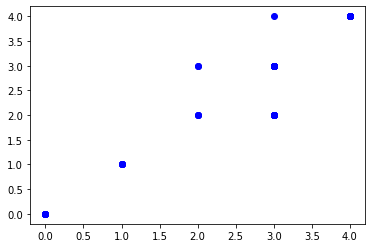

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y_test,model_pred,'bo')

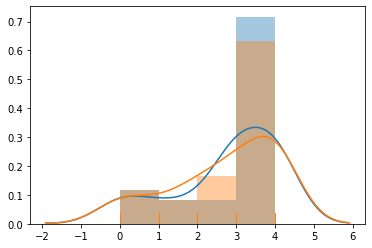

In [81]:
import seaborn as sns 

sns.distplot(y_test,hist=True,rug=True,label='original')
sns.distplot(model_pred,hist=True,rug=True,label='predicted')

In [82]:
from sklearn import preprocessing
df2 = df.apply(preprocessing.LabelEncoder().fit_transform)
df2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8,0,0,0,167,4
1,30,1,1,0,89,2
2,30,1,1,0,43,2
3,12,0,2,0,10,3
4,44,0,1,0,133,4


In [83]:
from id3 import export_graphviz

In [84]:
featureNames = df.columns[0:5]
export_graphviz(estimator.tree_,'tree.dot',feature_names=featureNames)

<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

In [85]:
! dot -Tpng tree.dot -o tree.png

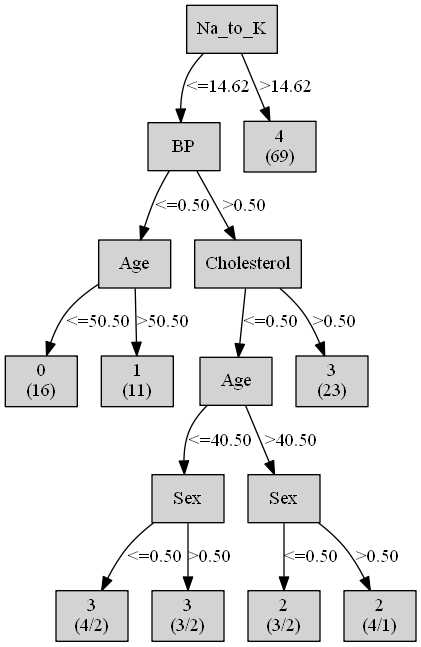

In [86]:
from IPython.display import Image
Image(filename='C:\\Users\\hitesh\\data science\\machine learning\\tree.png')